In [39]:
# importing libraries
from google.colab import drive
drive.mount("/content/drive")
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Defining the file location to read the dataset


In [40]:
path = ("/content/drive/MyDrive/CSV/diabetes.csv")
df_diabetes = pd.read_csv(path)


In [41]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [43]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
# checking any misssing values in the dataset
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

split the data set into train data and test data

In [46]:
X = df_diabetes.drop("Outcome", axis = 1)
Y = df_diabetes["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
# test_size means training data = 20% and test data = 80%
print(X)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [47]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((614, 8), (154, 8), (614,), (154,))

In [49]:
# import libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# define the keras model
model = Sequential()
model.add(Dense(18,activation="relu",input_dim=8))
model.add(Dense(8,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 18)                162       
                                                                 
 dense_10 (Dense)            (None, 8)                 152       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 323 (1.26 KB)
Trainable params: 323 (1.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# training the model, we will use fit() function
# number of epochs is the numberof times the model will cycle through the data
# with tf.keras.utils.custom_object_scope({'binary_crossentropy': tf.keras.losses.BinaryCrossentropy()}):
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 3.6233 - accuracy: 0.5886 - val_loss: 2.6456 - val_accuracy: 0.6016
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 2.4495 - accuracy: 0.5723 - val_loss: 1.8575 - val_accuracy: 0.6016
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 1.7273 - accuracy: 0.5560 - val_loss: 1.5315 - val_accuracy: 0.6260
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1.3962 - accuracy: 0.5540 - val_loss: 1.3309 - val_accuracy: 0.6423
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.1790 - accuracy: 0.5764 - val_loss: 1.1582 - val_accuracy: 0.6016
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0354 - accuracy: 0.5886 - val_loss: 1.0475 - val_accuracy: 0.5772
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9282 - accuracy: 0.5804 - val_loss: 0.9406 - val_accuracy: 0.6098
Epoch 8/100


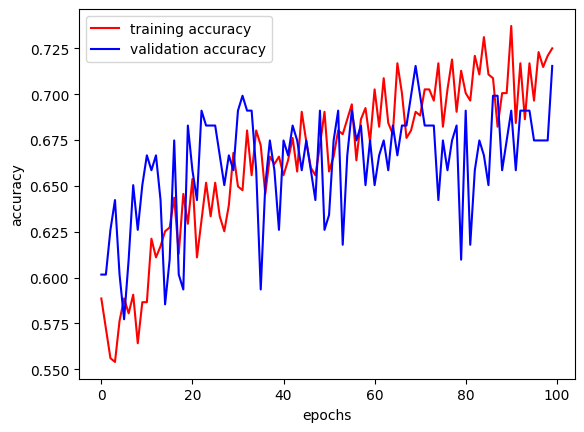

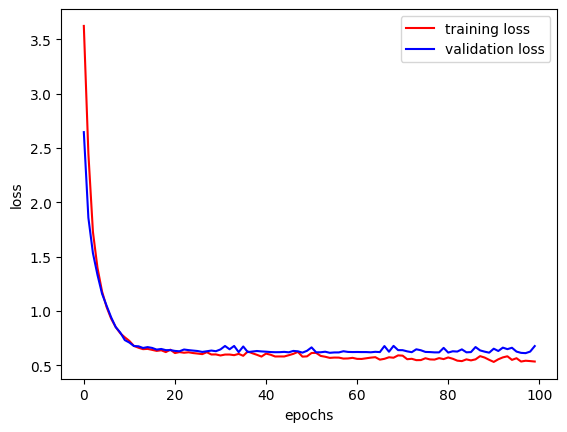

In [51]:
# plot graph
plt.plot(history.history['accuracy'],'r',label="training accuracy")
plt.plot(history.history['val_accuracy'],'b',label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'],'r',label="training loss")
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
